<a href="https://colab.research.google.com/github/Pratyay1010/Robot-Navigation-From-Motor-Imaginary-Signals/blob/testing/eeg_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
pip install mne

In [2]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig

### **Data Importing**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Final Year Project/Datasets/

/content/drive/MyDrive/Final Year Project/Datasets


In [5]:
ls

S01_ME/


In [6]:
from glob import glob
S01_ME_Files = glob('S01_ME/*.gdf')
#S01_MI_Files = glob('Datasets/S01/S01_MI/*.gdf')

In [7]:
S01_ME_Files

['S01_ME/motorexecution_subject1_run1.gdf',
 'S01_ME/motorexecution_subject1_run2.gdf',
 'S01_ME/motorexecution_subject1_run3.gdf',
 'S01_ME/motorexecution_subject1_run4.gdf',
 'S01_ME/motorexecution_subject1_run5.gdf',
 'S01_ME/motorexecution_subject1_run6.gdf',
 'S01_ME/motorexecution_subject1_run7.gdf',
 'S01_ME/motorexecution_subject1_run8.gdf',
 'S01_ME/motorexecution_subject1_run9.gdf',
 'S01_ME/motorexecution_subject1_run10.gdf']

##Data Testing

In [ ]:
raw = mne.io.read_raw_gdf(S01_ME_Files[0], exclude=('eog-r', 'eog-m', 'eog-l','thumb_near', 'thumb_far', 'thumb_index', 'index_near', 'index_far', 'index_middle', 'middle_near', 'middle_far', 'middle_ring', 'ring_near', 'ring_far', 'ring_little', 'litte_near', 'litte_far', 'thumb_palm', 'wrist_bend', 'roll', 'pitch', 'gesture', 'handPosX', 'handPosY', 'handPosZ', 'elbowPosX', 'elbowPosY', 'elbowPosZ', 'ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation', 'Elbow', 'ProSupination', 'Wrist', 'GripPressure'),preload=True)

Extracting EDF parameters from /content/drive/MyDrive/Final Year Project/Datasets/S01_ME/motorexecution_subject1_run1.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg, eeg
Creating raw.info structure...
Reading 0 ... 164863  =      0.000 ...   321.998 secs...


/usr/lib/python3.7/contextlib.py:119: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
  next(self.gen)


In [ ]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: eeg-0, eeg-1, eeg-2, eeg-3, eeg-4, eeg-5, eeg-6, eeg-7, eeg-8, ...
 chs: 61 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: 2015-05-26 15:42:48 UTC
 nchan: 61
 projs: []
 sfreq: 512.0 Hz
>


In [ ]:
raw.to_data_frame().head(25)

,time,eeg-0,eeg-1,eeg-2,eeg-3,eeg-4,eeg-5,eeg-6,eeg-7,eeg-8,...,eeg-51,eeg-52,eeg-53,eeg-54,eeg-55,eeg-56,eeg-57,eeg-58,eeg-59,eeg-60
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.001953,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.003906,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.005859,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.007812,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.009766,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.011719,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0.013672,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.015625,-4.086637e+09,-3.967849e+09,-4.336031e+09,-4.125436e+09,-3.864307e+09,-4.410733e+09,-5.215298e+09,-4.242579e+09,-4.227743e+09,...,-3.544387e+09,-3.384800e+09,-3.494747e+09,-3.547401e+09,-3.835159e+09,-3.633541e+09,-3.652717e+09,-3.737053e+09,-3.428939e+09,-3.626207e+09
9,0.017578,-4.094279e+09,-3.974687e+09,-4.339747e+09,-4.132001e+09,-3.870871e+09,-4.416634e+09,-5.222529e+09,-4.245489e+09,-4.230128e+09,...,-3.552893e+09,-3.395047e+09,-3.509589e+09,-3.560778e+09,-3.845707e+09,-3.641054e+09,-3.661287e+09,-3.744964e+09,-3.434537e+09,-3.632492e+09


In [ ]:
raw.set_eeg_reference()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawGDF | motorexecution_subject1_run1.gdf, 61 x 164864 (322.0 s), ~76.8 MB, data loaded>

In [ ]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


In [ ]:
events

(array([[  2560,      0,     17],
        [  2560,      0,     18],
        [  2560,      0,     19],
        [  3584,      0,      2],
        [  5120,      0,      8],
        [  5120,      0,      9],
        [  5120,      0,     11],
        [  6187,      0,     17],
        [  6187,      0,     18],
        [  6187,      0,     19],
        [  7211,      0,      6],
        [  8747,      0,      8],
        [  8747,      0,      9],
        [  8747,      0,     15],
        [ 10122,      0,     17],
        [ 10122,      0,     18],
        [ 10122,      0,     19],
        [ 11146,      0,      7],
        [ 12682,      0,      8],
        [ 12682,      0,      9],
        [ 12682,      0,     16],
        [ 13902,      0,     17],
        [ 13902,      0,     18],
        [ 13902,      0,     19],
        [ 14926,      0,      7],
        [ 16462,      0,      8],
        [ 16462,      0,      9],
        [ 16462,      0,     16],
        [ 17568,      0,     17],
        [ 1756

In [ ]:
events[0]

array([[  2560,      0,     17],
       [  2560,      0,     18],
       [  2560,      0,     19],
       [  3584,      0,      2],
       [  5120,      0,      8],
       [  5120,      0,      9],
       [  5120,      0,     11],
       [  6187,      0,     17],
       [  6187,      0,     18],
       [  6187,      0,     19],
       [  7211,      0,      6],
       [  8747,      0,      8],
       [  8747,      0,      9],
       [  8747,      0,     15],
       [ 10122,      0,     17],
       [ 10122,      0,     18],
       [ 10122,      0,     19],
       [ 11146,      0,      7],
       [ 12682,      0,      8],
       [ 12682,      0,      9],
       [ 12682,      0,     16],
       [ 13902,      0,     17],
       [ 13902,      0,     18],
       [ 13902,      0,     19],
       [ 14926,      0,      7],
       [ 16462,      0,      8],
       [ 16462,      0,      9],
       [ 16462,      0,     16],
       [ 17568,      0,     17],
       [ 17568,      0,     18],
       [ 1

In [ ]:
events[1]

{'1536': 1,
 '1537': 2,
 '1538': 3,
 '1539': 4,
 '1540': 5,
 '1541': 6,
 '1542': 7,
 '33536': 8,
 '33554': 9,
 '34304': 10,
 '34305': 11,
 '34306': 12,
 '34307': 13,
 '34308': 14,
 '34309': 15,
 '34310': 16,
 '768': 17,
 '785': 18,
 '786': 19}

In [ ]:
event_dir={
    'elbow flexion':1,
    'elbow extension':2,
    'supination':3,
    'pronation':4, 
    'hand close':5,
    'hand open':6,   
    'rest':7
}
event_dir

{'elbow flexion': 1,
 'elbow extension': 2,
 'supination': 3,
 'pronation': 4,
 'hand close': 5,
 'hand open': 6,
 'rest': 7}

<ipython-input-45-bc39db60976a>:2: RuntimeWarning: event 8 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-45-bc39db60976a>:2: RuntimeWarning: event 9 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-45-bc39db60976a>:2: RuntimeWarning: event 10 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-45-bc39db60976a>:2: RuntimeWarning: event 11 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-45-bc39db60976a>:2: RuntimeWarning: event 12 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-45-bc39db60976a>:2: RuntimeWarning: event 13 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-45-bc39db60976a>:2: RuntimeWarning: event 14 missing from event_id will be ignored
  first_samp=raw.first_samp)
<ipython-input-45-bc39db60976a>:2: RuntimeWarning: event 15 missing from event_id will be ignored
  first_samp=ra

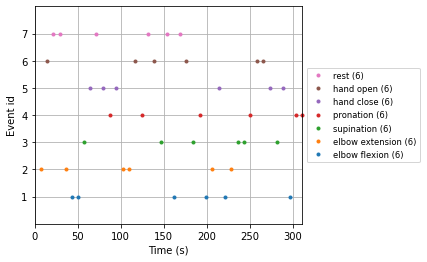

In [ ]:
fig = mne.viz.plot_events(events[0], event_id=event_dir, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [ ]:
epoch = mne.Epochs(raw,events[0],event_id=[i for i in range(1,8)],tmin=-0.1,tmax=0.3)

Not setting metadata
42 matching events found
Setting baseline interval to [-0.099609375, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [ ]:
epoch.get_data().shape

Using data from preloaded Raw for 42 events and 206 original time points ...
0 bad epochs dropped


(42, 61, 206)

In [ ]:
lables=epoch.events[:,-1]
lables

array([2, 6, 7, 7, 2, 1, 1, 3, 5, 7, 5, 4, 5, 2, 2, 6, 4, 7, 6, 3, 7, 1,
       7, 6, 3, 4, 1, 2, 5, 1, 2, 3, 3, 4, 6, 6, 5, 3, 5, 1, 4, 4])

In [ ]:
evoked=[]
for i in range(7):
    evoked.append(epoch[str(i+1)].average())

In [ ]:
dicts={
    'elbow flexion':evoked[0],
    'elbow extension':evoked[1],
    'supination':evoked[2],
    'pronation':evoked[3],
    'hand close':evoked[4],
    'hand open':evoked[5],   
    'rest':evoked[6],
}

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


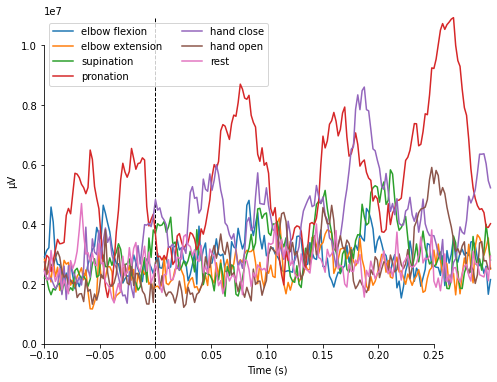

[<Figure size 576x432 with 1 Axes>]

In [ ]:
mne.viz.plot_compare_evokeds(dicts) 

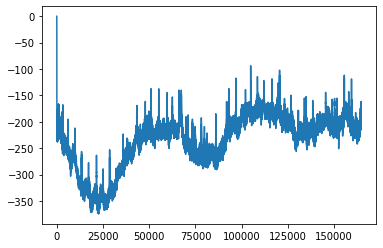

In [ ]:
plt.plot(raw.get_data()[0])
plt.show()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.500 (s)


<ipython-input-53-e6ebfa11c45f>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=100)


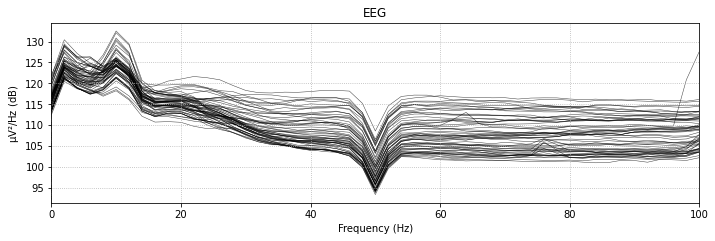

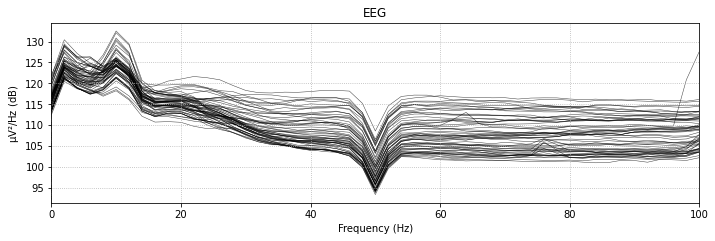

In [ ]:
raw.plot_psd(fmax=100)

In [ ]:
raw_filter = raw.copy().filter(0.5,50)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3381 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    0.5s finished


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.500 (s)


<ipython-input-55-cc7ea1955451>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filter.plot_psd(fmax=100)


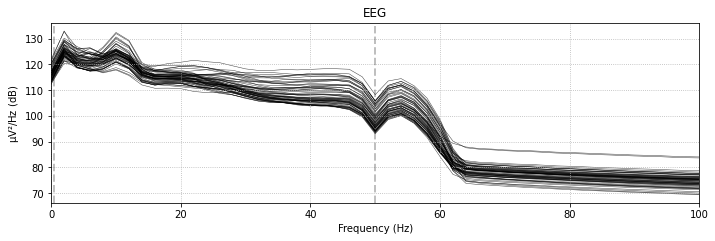

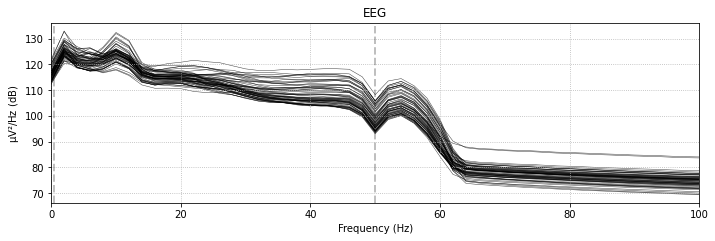

In [ ]:
raw_filter.plot_psd(fmax=100)

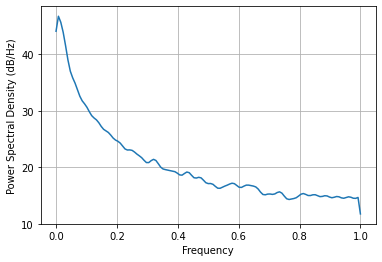

In [ ]:
plt.psd(raw.copy().get_data())
plt.show()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 16897 samples (33.002 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    0.9s finished


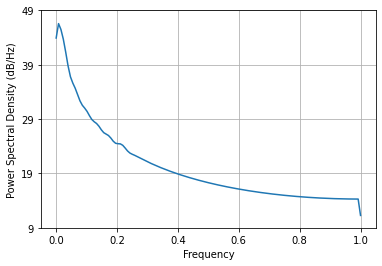

In [ ]:
plt.psd(raw.copy().filter(0.1,50).get_data())
plt.show()

In [ ]:
plt.psd(bandpassfilter(raw.copy().get_data()))
plt.show()

NameError: ignored

In [ ]:
group_list=np.array([[i]*len(j) for i,j in enumerate(epoch.get_data())])

In [ ]:
group_list.shape

In [ ]:
group_array = np.array(group_list)
group_array.shape

##Filtering
###Bandpass Filter

In [ ]:
def bandpassfilter(signal):

  fs=240.0
  lowcut=0.3
  highcut=70.0

  nyq=0.5*fs
  low=lowcut/nyq
  high=highcut/nyq

  order=2

  b,a = sig.butter(order, [low,high], 'bandpass', analog=False)
  y = sig.filtfilt(b,a,signal,axis=0)

  return y

##Preprocessing
###Power Spectral Density

##Data Concatenetination of all Files(ME)

In [ ]:
def read_data(path):
    raw = mne.io.read_raw_gdf(path,exclude=('eog-r', 'eog-m', 'eog-l','thumb_near', 'thumb_far', 'thumb_index', 'index_near', 'index_far', 'index_middle', 'middle_near', 'middle_far', 'middle_ring', 'ring_near', 'ring_far', 'ring_little', 'litte_near', 'litte_far', 'thumb_palm', 'wrist_bend', 'roll', 'pitch', 'gesture', 'handPosX', 'handPosY', 'handPosZ', 'elbowPosX', 'elbowPosY', 'elbowPosZ', 'ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation', 'Elbow', 'ProSupination', 'Wrist', 'GripPressure'),preload=True)
    raw.set_eeg_reference()
    events = mne.events_from_annotations(raw)
    epoch = mne.Epochs(raw,events[0],event_id=[i for i in range(1,8)],tmin=-0.1,tmax=0.7, on_missing='warn')
    lables=epoch.events[:,-1]
    features=epoch.get_data()
    features_filter = bandpassfilter(features)
    return lables,features_filter

In [ ]:
%%capture
l1,f1 = read_data(S01_ME_Files[0])
l2,f2 = read_data(S01_ME_Files[1])

labels = np.concatenate((l1,l2))
features = np.vstack((f1,f2))

for i in range(2,10):
  l,f = read_data(S01_ME_Files[i])

  labels = np.concatenate((labels,l))
  features = np.vstack((features,f))

In [ ]:
print(labels.shape,features.shape)

(420,) (420, 61, 410)


In [ ]:
features_final = features.reshape(-1,features.shape[-1])
features_final.shape, labels.shape

((25620, 410), (420,))

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size = 0.3, random_state = 100)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((294, 61, 410), (126, 61, 410), (294,), (126,))

In [ ]:
temp = np.moveaxis(X_train,2,0)
X_train_final = temp[0]

temp = np.moveaxis(X_test,2,0)
X_test_final = temp[0]

X_train_final.shape

(294, 61)

#Machine Learning Models

##SVM

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train[0,:,:],y_train)

ValueError: ignored

In [ ]:
regressor.score(X_test_final,y_test)

In [ ]:
#Accuraccy
print(regressor.score(X_test_final,y_test)*100)

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_final, y_train)
clf.predict(X_test_final)
clf.predict_proba(X_test_final)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[1.49287614e-02, 1.04037389e-02, 7.81885092e-01, 5.70522003e-02,
        3.65385259e-02, 3.62585552e-02, 6.29331259e-02],
       [1.92440927e-02, 6.11258142e-01, 7.91611723e-02, 1.89430865e-02,
        1.68193370e-02, 7.90643549e-02, 1.75509814e-01],
       [6.65469742e-02, 1.74964995e-02, 9.60906825e-02, 1.96657619e-01,
        3.34431548e-01, 2.74092276e-01, 1.46844008e-02],
       [1.96638525e-02, 1.12525646e-02, 7.16693959e-02, 2.49257186e-01,
        4.92441430e-01, 4.57354074e-03, 1.51142030e-01],
       [2.07569120e-01, 1.16705264e-02, 4.88538417e-02, 6.57857765e-01,
        2.40908741e-02, 1.77606862e-02, 3.21971870e-02],
       [6.53761847e-02, 6.41033783e-01, 7.30899305e-02, 7.00040636e-03,
        7.85941488e-02, 3.48264171e-02, 1.00079130e-01],
       [6.99280155e-02, 2.06486198e-02, 1.08831077e-02, 1.10459568e-01,
        4.82761195e-01, 3.19581401e-02, 2.73361354e-01],
       [1.67128731e-01, 1.74958610e-01, 5.65757636e-02, 1.98882612e-01,
        1.16168700e-01, 1

In [ ]:
X_test_final.shape, y_test.shape

((126, 61), (126,))

In [ ]:
clf.score(X_test_final, y_test)*100

5.555555555555555

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(p=1)
clf.fit(X_train[:,:,-1], y_train)
predictions = clf.predict(X_test_final)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions)*100,'%')

12.698412698412698 %


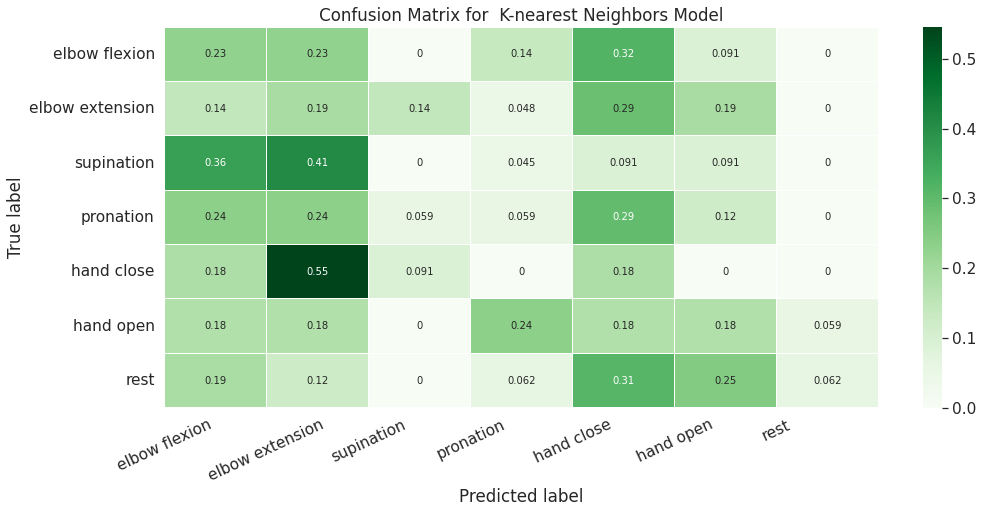

In [ ]:
import seaborn as sns
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = event_dir.keys()
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for  K-nearest Neighbors Model')
plt.show()

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

rf.fit(X_train[:,:,0], y_train);

In [ ]:
predictions = rf.predict(X_test[:,:,0])

errors = abs(predictions - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.25 degrees.


In [ ]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -13.0 %.


In [ ]:
y_pred_test = rf.predict(X_test[:,:,0])
y_pred_test

array([3, 5, 2, 4, 3, 2, 4, 4, 2, 6, 3, 7, 5, 3, 4, 7, 7, 4, 7, 6, 4, 7,
       7, 6, 7, 6, 5, 5, 3, 7, 3, 1, 2, 7, 4, 4, 3, 7, 7, 4, 5, 1, 5, 3,
       6, 2, 7, 4, 6, 2, 7, 5, 4, 2, 7, 1, 3, 6, 1, 6, 7, 3, 5, 4, 4, 5,
       4, 5, 1, 6, 7, 5, 6, 6, 7, 2, 6, 4, 4, 6, 4, 2, 5, 5, 4, 7, 4, 2,
       5, 2, 3, 4, 6, 1, 6, 6, 6, 2, 1, 4, 5, 3, 1, 4, 7, 4, 4, 3, 3, 6,
       6, 5, 2, 4, 2, 7, 1, 1, 5, 5, 4, 7, 3, 5, 1, 5])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test, labels = np.unique(labels))

array([[0, 3, 2, 4, 6, 3, 4],
       [2, 2, 3, 5, 2, 2, 5],
       [5, 4, 2, 4, 3, 1, 3],
       [1, 3, 2, 1, 3, 5, 2],
       [2, 0, 0, 3, 3, 2, 1],
       [1, 0, 3, 7, 2, 3, 1],
       [0, 2, 3, 2, 1, 3, 5]])

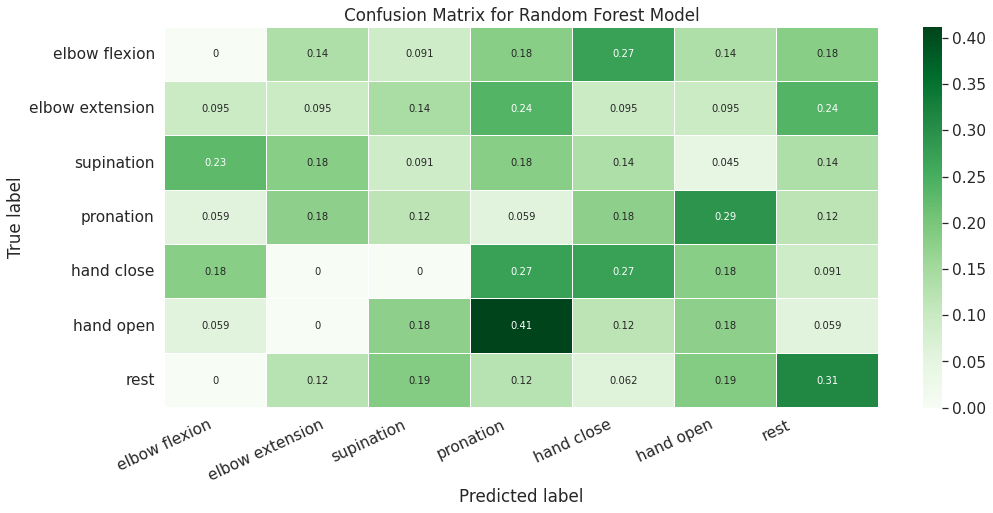

In [ ]:
import seaborn as sns
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = event_dir.keys()
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

#Deep Learning Models

# ####CNN

In [ ]:
features= np.moveaxis(features,1,2)

In [ ]:
labels.shape,features.shape

((420,), (420, 410, 61))

In [ ]:
from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D,\
 GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session

def cnnmodel():
  clear_session()
  model = Sequential()
  model.add(Conv1D(filters=5,kernel_size=3,strides=1,input_shape=(410, 61)))
  model.add(BatchNormalization())
  model.add(LeakyReLU())
  model.add(MaxPool1D(pool_size=2,strides=2))
  model.add(Conv1D(filters=5,kernel_size=3,strides=1))
  model.add(LeakyReLU())
  model.add(MaxPool1D(pool_size=2,strides=2))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters=5,kernel_size=3,strides=2))
  model.add(LeakyReLU())
  model.add(AveragePooling1D(pool_size=2,strides=2))
  model.add(Dropout(0.5))
  model.add(Conv1D(filters=5,kernel_size=3,strides=1))
  model.add(LeakyReLU())
  model.add(GlobalAveragePooling1D())
  model.add(Dense(1,activation='sigmoid'))

  model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model
  
model = cnnmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 408, 5)            920       
                                                                 
 batch_normalization (BatchN  (None, 408, 5)           20        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 408, 5)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 204, 5)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 202, 5)            80        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 202, 5)            0

####cn

In [ ]:
group_list = [[i]*len(j) for i,j in enumerate(features)]
group_array = np.array(group_list)
group_array = np.moveaxis(group_array,1,0)[0]
group_array

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
from sklearn.model_selection import GroupKFold, LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
gkf = GroupKFold()

In [ ]:
accuracy = []
for train_index, test_index in gkf.split(features, labels, groups=group_array):
  train_features, train_labels = features[train_index], labels[train_index]
  test_features, test_labels = features[test_index], labels[test_index]

  scaler=StandardScaler()
  train_features = scaler.fit_transform(train_features.reshape(-1,train_features.shape[-1])).reshape(train_features.shape)
  test_features = scaler.transform(test_features.reshape(-1,test_features.shape[-1])).reshape(test_features.shape)

  model = cnnmodel()
  model.fit(train_features,train_labels,epochs=500,validation_data=(test_features,test_labels))
  accuracy.append(model.evaluate(test_features,test_labels)[1])
  break

print("Accuracy: ", accuracy[0]*100, "%")

Epoch 1/500
11/11 [==============================] - 3s 92ms/step - loss: 0.5213 - accuracy: 0.0982 - val_loss: 0.0338 - val_accuracy: 0.1905
Epoch 2/500
11/11 [==============================] - 1s 53ms/step - loss: -0.3890 - accuracy: 0.1310 - val_loss: -0.8074 - val_accuracy: 0.1905
Epoch 3/500
11/11 [==============================] - 1s 61ms/step - loss: -1.5741 - accuracy: 0.1310 - val_loss: -1.9179 - val_accuracy: 0.1905
Epoch 4/500
11/11 [==============================] - 1s 59ms/step - loss: -3.1998 - accuracy: 0.1310 - val_loss: -3.6227 - val_accuracy: 0.1905
Epoch 5/500
11/11 [==============================] - 1s 50ms/step - loss: -5.3450 - accuracy: 0.1310 - val_loss: -6.2615 - val_accuracy: 0.1905
Epoch 6/500
11/11 [==============================] - 0s 29ms/step - loss: -8.6706 - accuracy: 0.1310 - val_loss: -9.9264 - val_accuracy: 0.1905
Epoch 7/500
11/11 [==============================] - 0s 29ms/step - loss: -13.5517 - accuracy: 0.1310 - val_loss: -15.6248 - val_accuracy:

####test cnn

In [ ]:
X_train_final = np.moveaxis(X_train,1,2)
X_test_final = np.moveaxis(X_test,1,2)
X_train_final.shape, X_test_final.shape

((294, 410, 61), (126, 410, 61))

In [ ]:
scaler=StandardScaler()
X_train_features = scaler.fit_transform(X_train_final.reshape(-1,X_train_final.shape[-1])).reshape(X_train_final.shape)
X_test_lebels = scaler.transform(X_test_final.reshape(-1,X_test_final.shape[-1])).reshape(X_test_final.shape)

In [ ]:
model = cnnmodel()
model.fit(X_train_features,y_train,epochs=5000,validation_data=(X_test_lebels,y_test))
accuracy.append(model.evaluate(X_test_lebels,y_test)[1])

print("Accuracy = ",accuracy[0],"%")

Streaming output truncated to the last 5000 lines.
Epoch 2502/5000
10/10 [==============================] - 0s 50ms/step - loss: -1592205901824.0000 - accuracy: 0.1293 - val_loss: -1399806361600.0000 - val_accuracy: 0.1746
Epoch 2503/5000
10/10 [==============================] - 1s 52ms/step - loss: -1589048901632.0000 - accuracy: 0.1293 - val_loss: -1379892723712.0000 - val_accuracy: 0.1746
Epoch 2504/5000
10/10 [==============================] - 1s 51ms/step - loss: -1609812279296.0000 - accuracy: 0.1293 - val_loss: -1394292424704.0000 - val_accuracy: 0.1746
Epoch 2505/5000
10/10 [==============================] - 0s 50ms/step - loss: -1607373422592.0000 - accuracy: 0.1293 - val_loss: -1386955407360.0000 - val_accuracy: 0.1746
Epoch 2506/5000
10/10 [==============================] - 1s 52ms/step - loss: -1603443359744.0000 - accuracy: 0.1293 - val_loss: -1392882876416.0000 - val_accuracy: 0.1746
Epoch 2507/5000
10/10 [==============================] - 1s 50ms/step - loss: -1597940826